# File: Time Evolution

In [ ]:
# Imports
import numpy as np
import sunpy.time
from astropy.time import Time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams["font.family"] = "Times New Roman"
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as plticker
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.gridspec as gridspec
matplotlib.rcParams['text.usetex'] = True
import sunpy.timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.time import TimeRange

## Predictive Science Inc. (PSI) Database: List of times of 193-195 Angstroms synchronic maps and coronal hole (CH) masks

In [ ]:
# List of times of the PSI database
filename = 'euvchm_map_list.npz'
tmp = np.load(filename)
# Label (map number)
caplan_labels = tmp['caplan_labels'] 
# Date (string format: YYYY-MM-DDThh:mm:ss)
caplan_times = tmp['caplan_times']
# Total number of maps
caplan_nb = len(caplan_times)

# Initial time (in seconds)
t0 = Time('2010-01-01T00:00:00').utime
# Convert to floats
caplan_t = np.zeros((caplan_nb))
# Convert times in seconds and shift 0 to Jan 1st. 2010
for i in range(caplan_nb):
    caplan_t[i] = Time(caplan_times[i]).utime-t0

## WSO Polar Field Observations 

In [ ]:
# WSO
filename = 'wso_polar_field_observations.npz'
tmp = np.load(filename)
# Date (string format: YYYY-MM-DDThh:mm:ss)
wso_times = tmp['wso_times']
# Data
wso_n = tmp['wso_n']
wso_s = tmp['wso_s']
wso_avg = tmp['wso_avg']
# Data (filtered)
wso_nf = tmp['wso_nf']
wso_sf = tmp['wso_sf']
wso_avgf = tmp['wso_avgf']
# Total number of measurements
wso_nb = len(wso_times)

# Initial time
t0 = Time('2010-01-01T00:00:00').utime
# Convert to floats
wso_t = np.zeros((wso_nb))
# Convert times in seconds and shift 0 to Jan 1st. 2010
for i in range(wso_nb):
    wso_t[i] = Time(wso_times[i]).utime-t0

Plot evolution of the polar field strength (absolute value; non-filtered):

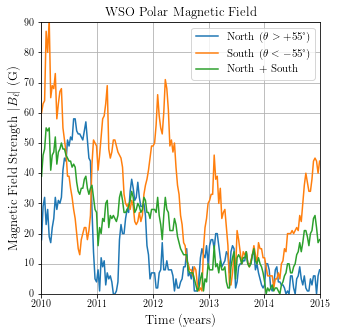

In [ ]:
# File
filename = 'Fig_WSO_field.png'
file_format = 'png'

# Convert to years
factor = 1.0/(365.25*24.0*60.0*60.0)
year_i = 2010. 
year_f = 2015.

# Data
x0 = year_i + wso_t*factor
x1 = year_i + wso_t*factor
x2 = year_i + wso_t*factor
y0 = np.abs(wso_n)
y1 = np.abs(wso_s)
y2 = np.abs(wso_avg)

# Plot
font_size = 13
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(x0, y0, c=colors[0], label=r'North ($\theta > +55$°)')
ax.plot(x1, y1, c=colors[1], label=r'South ($\theta < -55$°)')
ax.plot(x2, y2, c=colors[2], label=r'North + South')
ax.grid(True)
ax.set_xlim(year_i, year_f)
ax.set_ylim(0, 90)
ax.set_title('WSO Polar Magnetic Field', fontsize=font_size)
ax.set_xlabel('Time (years)', fontsize=font_size)
ax.set_ylabel('Magnetic Field Strength $|B_{\ell}|$ (G)', fontsize=font_size)
ax.legend(loc='best', numpoints=1, fontsize=11)

plt.draw()
plt.savefig(filename, format=file_format, dpi=300)
# plt.close('all')

Plot evolution of the polar field strength (absolute value; filtered):

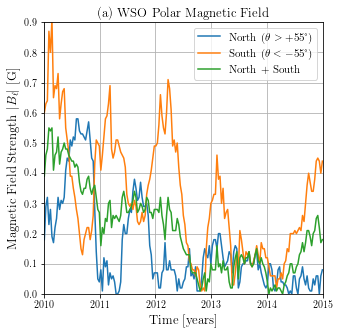

In [ ]:
# File
filename = 'Fig_WSO_field_filtered.png'
file_format = 'png'

# Convert to years
factor = 1.0/(365.25*24.0*60.0*60.0)
year_i = 2010. 
year_f = 2015.

# Data
x0 = year_i + wso_t*factor
x1 = year_i + wso_t*factor
x2 = year_i + wso_t*factor
y0 = np.abs(wso_nf)*0.01
y1 = np.abs(wso_sf)*0.01
y2 = np.abs(wso_avgf)*0.01

# Plot
font_size = 13
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(x0, y0, c=colors[0], label=r'North ($\theta > +55$°)')
ax.plot(x1, y1, c=colors[1], label=r'South ($\theta < -55$°)')
ax.plot(x2, y2, c=colors[2], label=r'North + South')
ax.grid(True)
ax.set_xlim(year_i, year_f)
ax.set_ylim(0, 90*0.01)
ax.set_title('(a) WSO Polar Magnetic Field', fontsize=font_size)
ax.set_xlabel('Time [years]', fontsize=font_size)
ax.set_ylabel('Magnetic Field Strength $|B_{\ell}|$ [G]', fontsize=font_size)
ax.legend(loc='best', numpoints=1, fontsize=11)

plt.draw()
plt.savefig(filename, format=file_format, dpi=300)

## K-means: Polar CH Area

Read K-means results:

In [ ]:
# Read Kmeans predictions
filename = 'Kmeans_lb_15i_6c_metrics.npz'
tmp = np.load(filename)
# SSIM (including missing data)
ssim_arr = tmp['ssim_arr']
# IoU (including missing data)
iou_arr = tmp['iou_arr']
# SSIM (excluding missing data)
ssim_filt_arr = tmp['ssim_filt_arr']
# IoU (excluding missing data)
iou_filt_arr = tmp['iou_filt_arr']
# Nb. of pixels labeled as CHs (as a function of latitude)
# North (latitude > 55 degrees)
n_50deg = tmp['n_50deg']
# South (latitude < -55 degrees)
s_50deg = tmp['s_50deg']
# Center (-55 degrees < latitude < 55 degrees)
c_50deg = tmp['c_50deg']
n_55deg = tmp['n_55deg']
s_55deg = tmp['s_55deg']
c_55deg = tmp['c_55deg'] 
n_hemisphere = tmp['n_hemisphere']
s_hemisphere = tmp['s_hemisphere']
# Nb. of pixels with missing data (as a function of latitude)
n_badpix_50deg = tmp['n_badpix_50deg']
s_badpix_50deg = tmp['s_badpix_50deg']
c_badpix_50deg = tmp['c_badpix_50deg']
n_badpix_55deg = tmp['n_badpix_55deg']
s_badpix_55deg = tmp['s_badpix_55deg']
c_badpix_55deg = tmp['c_badpix_55deg']
n_hemisphere_badpix = tmp['n_hemisphere_badpix']
s_hemisphere_badpix = tmp['s_hemisphere_badpix']
# Nb. of pixels with no missing data (as a function of latitude)
n_goodpix_50deg = tmp['n_goodpix_50deg']
s_goodpix_50deg = tmp['s_goodpix_50deg']
c_goodpix_50deg = tmp['c_goodpix_50deg']
n_goodpix_55deg = tmp['n_goodpix_55deg']
s_goodpix_55deg = tmp['s_goodpix_55deg']
c_goodpix_55deg = tmp['c_goodpix_55deg'] 
n_hemisphere_goodpix = tmp['n_hemisphere_goodpix']
s_hemisphere_goodpix = tmp['s_hemisphere_goodpix']
# Nb. of predictions
n_predictions = len(ssim_arr)

[995200. 995200. 995200. ... 995200. 995200. 995200.]
[995200. 995200. 995200. ... 995200. 995200. 995200.]


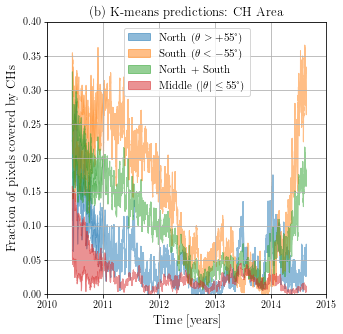

In [ ]:
# File
filename = 'Fig_CH_area_Kmeans.png'
file_format = 'png'

# Convert to years
factor = 1.0/(365.25*24.0*60.0*60.0)
year_i = 2010. 
year_f = 2015.

# Data
x0 = year_i + caplan_t[0:n_predictions]*factor
x1 = year_i + caplan_t[0:n_predictions]*factor
x2 = year_i + caplan_t[0:n_predictions]*factor
x3 = year_i + caplan_t[0:n_predictions]*factor
y0 = (n_55deg)/(n_goodpix_55deg+n_badpix_55deg)
y1 = (s_55deg)/(s_goodpix_55deg+s_badpix_55deg)
y2 = 0.5*(y0+y1)
y3 = (c_55deg)/(c_goodpix_55deg+c_badpix_55deg)

# Plot
font_size = 13
alpha = 0.5
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
fig, ax = plt.subplots(figsize=(5, 5))

ax.fill_between(x0, y0, y0+n_badpix_55deg/(n_goodpix_55deg+n_badpix_55deg), edgecolor=colors[0], facecolor=colors[0], label=r'North ($\theta > +55$°)', alpha=alpha)
ax.fill_between(x1, y1, y1+s_badpix_55deg/(s_goodpix_55deg+s_badpix_55deg), edgecolor=colors[1], facecolor=colors[1], label=r'South ($\theta < -55$°)', alpha=alpha)
ax.fill_between(x2, y2, y2+0.5*(n_badpix_55deg/(n_goodpix_55deg+n_badpix_55deg)+s_badpix_55deg/(s_goodpix_55deg+s_badpix_55deg)), edgecolor=colors[2], facecolor=colors[2], label=r'North + South', alpha=alpha)
ax.fill_between(x3, y3, y3+c_badpix_55deg/(c_goodpix_55deg+c_badpix_55deg), edgecolor=colors[3], facecolor=colors[3], label=r'Middle ($|\theta| \le 55$°)', alpha=alpha)
ax.grid(True)
ax.set_xlim(year_i, year_f)
ax.set_ylim(0., 0.4)
ax.set_title('(b) K-means predictions: CH Area', fontsize=font_size)
ax.set_xlabel('Time [years]', fontsize=font_size)
ax.set_ylabel('Fraction of pixels covered by CHs', fontsize=font_size)
ax.legend(loc='upper center', numpoints=1, fontsize=11)

plt.draw()
plt.savefig(filename, format=file_format, dpi=300)

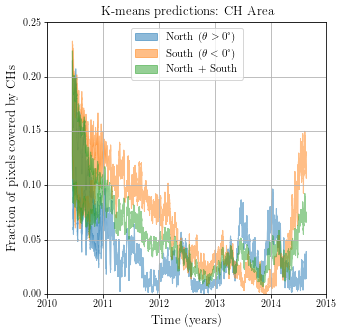

In [ ]:
# File
filename = 'plot_CH_area_Kmeans_hemisphere.png'
file_format = 'png'

# Convert to years
factor = 1.0/(365.25*24.0*60.0*60.0)
year_i = 2010. 
year_f = 2015.

# Data
x0 = year_i + caplan_t[0:n_predictions]*factor
x1 = year_i + caplan_t[0:n_predictions]*factor
x2 = year_i + caplan_t[0:n_predictions]*factor
y0 = (n_hemisphere)/(n_hemisphere_goodpix+n_hemisphere_badpix)
y1 = (s_hemisphere)/(s_hemisphere_goodpix+s_hemisphere_badpix)
y2 = 0.5*(y0+y1)

# Plot
font_size = 13
alpha = 0.5
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
fig, ax = plt.subplots(figsize=(5, 5))

ax.fill_between(x0, y0, y0+n_hemisphere_badpix/(n_hemisphere_goodpix+n_hemisphere_badpix), edgecolor=colors[0], facecolor=colors[0], label=r'North ($\theta > 0$°)', alpha=alpha)
ax.fill_between(x1, y1, y1+s_hemisphere_badpix/(s_hemisphere_goodpix+s_hemisphere_badpix), edgecolor=colors[1], facecolor=colors[1], label=r'South ($\theta < 0$°)', alpha=alpha)
ax.fill_between(x2, y2, y2+0.5*(n_hemisphere_badpix/(n_hemisphere_goodpix+n_hemisphere_badpix)+s_hemisphere_badpix/(s_hemisphere_goodpix+s_hemisphere_badpix)), edgecolor=colors[2], facecolor=colors[2], label=r'North + South', alpha=alpha)
ax.grid(True)
ax.set_xlim(year_i, year_f)
ax.set_ylim(0., 0.25)
ax.set_title('K-means predictions: CH Area', fontsize=font_size)
ax.set_xlabel('Time (years)', fontsize=font_size)
ax.set_ylabel('Fraction of pixels covered by CHs', fontsize=font_size)
ax.legend(loc='upper center', numpoints=1, fontsize=11)

plt.draw()
plt.savefig(filename, format=file_format, dpi=300)

## W-net: Polar CH Area

Read W-net results:

In [ ]:
# Read Kmeans predictions
filename = 'wnet_metrics_291120.npz'
tmp = np.load(filename)
# SSIM (including missing data)
ssim_arr = tmp['ssim_arr']
# IoU (including missing data)
iou_arr = tmp['iou_arr']
# SSIM (excluding missing data)
ssim_filt_arr = tmp['ssim_filt_arr']
# IoU (excluding missing data)
iou_filt_arr = tmp['iou_filt_arr']
# Nb. of pixels labeled as CHs (as a function of latitude)
# North (latitude > 55 degrees)
n_50deg = tmp['n_50deg']
# South (latitude < -55 degrees)
s_50deg = tmp['s_50deg']
# Center (-55 degrees < latitude < 55 degrees)
c_50deg = tmp['c_50deg']
n_55deg = tmp['n_55deg']
s_55deg = tmp['s_55deg']
c_55deg = tmp['c_55deg'] 
n_hemisphere = tmp['n_hemisphere']
s_hemisphere = tmp['s_hemisphere']
# Nb. of pixels with missing data (as a function of latitude)
n_badpix_50deg = tmp['n_badpix_50deg']
s_badpix_50deg = tmp['s_badpix_50deg']
c_badpix_50deg = tmp['c_badpix_50deg']
n_badpix_55deg = tmp['n_badpix_55deg']
s_badpix_55deg = tmp['s_badpix_55deg']
c_badpix_55deg = tmp['c_badpix_55deg']
n_hemisphere_badpix = tmp['n_hemisphere_badpix']
s_hemisphere_badpix = tmp['s_hemisphere_badpix']
# Nb. of pixels with no missing data (as a function of latitude)
n_goodpix_50deg = tmp['n_goodpix_50deg']
s_goodpix_50deg = tmp['s_goodpix_50deg']
c_goodpix_50deg = tmp['c_goodpix_50deg']
n_goodpix_55deg = tmp['n_goodpix_55deg']
s_goodpix_55deg = tmp['s_goodpix_55deg']
c_goodpix_55deg = tmp['c_goodpix_55deg'] 
n_hemisphere_goodpix = tmp['n_hemisphere_goodpix']
s_hemisphere_goodpix = tmp['s_hemisphere_goodpix']
# Nb. of predictions
n_predictions = len(ssim_arr)

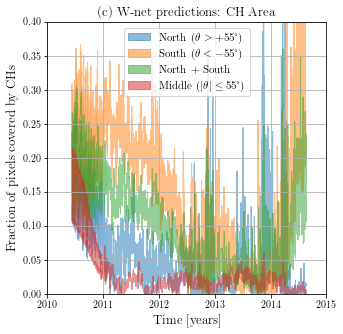

In [ ]:
# File
filename = 'Fig_CH_area_Wnet.png'
file_format = 'png'

# Convert to years
factor = 1.0/(365.25*24.0*60.0*60.0)
year_i = 2010. 
year_f = 2015.

# Data
n_i = 0
x0 = year_i + caplan_t[n_i:n_predictions]*factor
x1 = year_i + caplan_t[n_i:n_predictions]*factor
x2 = year_i + caplan_t[n_i:n_predictions]*factor
x3 = year_i + caplan_t[n_i:n_predictions]*factor
y0 = (n_55deg[n_i:])/(n_goodpix_55deg[n_i:]+n_badpix_55deg[n_i:])
y1 = (s_55deg[n_i:])/(s_goodpix_55deg[n_i:]+s_badpix_55deg[n_i:])
y2 = 0.5*(y0+y1)
y3 = (c_55deg[n_i:])/(c_goodpix_55deg[n_i:]+c_badpix_55deg[n_i:])

# Plot
font_size = 13
alpha = 0.5
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
fig, ax = plt.subplots(figsize=(5, 5))


ax.fill_between(x0, y0, y0+n_badpix_55deg[n_i:]/(n_goodpix_55deg[n_i:]+n_badpix_55deg[n_i:]), edgecolor=colors[0], facecolor=colors[0], label=r'North ($\theta > +55$°)', alpha=alpha)
ax.fill_between(x1, y1, y1+s_badpix_55deg[n_i:]/(s_goodpix_55deg[n_i:]+s_badpix_55deg[n_i:]), edgecolor=colors[1], facecolor=colors[1], label=r'South ($\theta < -55$°)', alpha=alpha)
ax.fill_between(x2, y2, y2+0.5*(n_badpix_55deg[n_i:]/(n_goodpix_55deg[n_i:]+n_badpix_55deg[n_i:])+s_badpix_55deg[n_i:]/(s_goodpix_55deg[n_i:]+s_badpix_55deg[n_i:])), edgecolor=colors[2], facecolor=colors[2], label=r'North + South', alpha=alpha)
ax.fill_between(x3, y3, y3+c_badpix_55deg[n_i:]/(c_goodpix_55deg[n_i:]+c_badpix_55deg[n_i:]), edgecolor=colors[3], facecolor=colors[3], label=r'Middle ($|\theta| \le 55$°)', alpha=alpha)
ax.grid(True)
ax.set_xlim(year_i, year_f)
ax.set_ylim(0., 0.4)
ax.set_title('(c) W-net predictions: CH Area', fontsize=font_size)
ax.set_xlabel('Time [years]', fontsize=font_size)
ax.set_ylabel('Fraction of pixels covered by CHs', fontsize=font_size)
ax.legend(loc='upper center', numpoints=1, fontsize=11)

plt.draw()
plt.savefig(filename, format=file_format, dpi=300)